# Task 1: Data Collection

## Step 1.1: Install required libraries

In [4]:
# !pip install scikit-learn xgboost matplotlib seaborn plotly --quiet

## Step 1.2: Import all necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Step 2 Data Acquisition Validation
- Confrim dataset integrity (readable, correct format, no currupted records)

In [5]:
# Load the dataset and do integrity checks on the data
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("✅ Dataset loaded successfully from primary path!")

✅ Dataset loaded successfully from primary path!


## Step 2.1: Initial data inspection

In [12]:
print("📊 DATASET OVERVIEW:")
print(f"Dataset shape: {df.shape}")
print(f"Number of customers: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

📊 DATASET OVERVIEW:
Dataset shape: (7043, 21)
Number of customers: 7043
Number of features: 21


In [13]:
print("\\n🔍 FIRST 5 ROWS:")
df.head(10)

\n🔍 FIRST 5 ROWS:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
print("📋 DATASET INFO:")
df.info()

📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [15]:
print("\\n📈 BASIC STATISTICS:")
df.describe()

\n📈 BASIC STATISTICS:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# STEP 2.2 : Data Quality Assessment & Missing Value Analysis

### Thoroughly examination of data quality, identify missing values, check data types, and understand the target variable distribution


## Step 2.1: Comprehensive Data Quality Check

In [17]:
print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")

print("\n📊 MISSING VALUES ANALYSIS:")
print(df.isnull().sum())

print("\n🎯 TARGET VARIABLE DISTRIBUTION (CHURN):")
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(f"\nChurn Rate: {churn_percentages['Yes']:.2f}%")
print(f"Retention Rate: {churn_percentages['No']:.2f}%")

🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT

📊 MISSING VALUES ANALYSIS:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

🎯 TARGET VARIABLE DISTRIBUTION (CHURN):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%
Retention Rate: 73.46%


## Step 2.2: Check for hidden missing values or data issues

In [18]:
print("\n🔎 CHECKING FOR DATA ISSUES:")

# Check for unexpected values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    if col != 'customerID':  # Skip customer ID
        print(f"{col}: {df[col].unique()}")


🔎 CHECKING FOR DATA ISSUES:

Unique values in categorical columns:
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


# Duplicate Removals


## Outlier detection

In [31]:
# # Using IQR method to detect and remove outliers
# Q1 = df[num_cols].quantile(0.25)
# Q3 = df[num_cols].quantile(0.75)
# IQR = Q3 - Q1
# df_outlier_cleaned = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(f"Removed {df.shape[0] - df_outlier_cleaned.shape[0]} outliers.")


## Step 2.3: Check TotalCharges column (appears as object but should be numeric)

In [19]:
print(f"\n💰 TOTALCHARGES DATA TYPE ISSUE:")
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")
print(f"Sample values: {df['TotalCharges'].head(10).values}")

# Check for empty strings or non-numeric values in TotalCharges
total_charges_issues = df[df['TotalCharges'] == ' ']
print(f"Number of empty values in TotalCharges: {len(total_charges_issues)}")


💰 TOTALCHARGES DATA TYPE ISSUE:
TotalCharges dtype: object
Sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Number of empty values in TotalCharges: 11


## Step 2.4: Visualize churn distribution

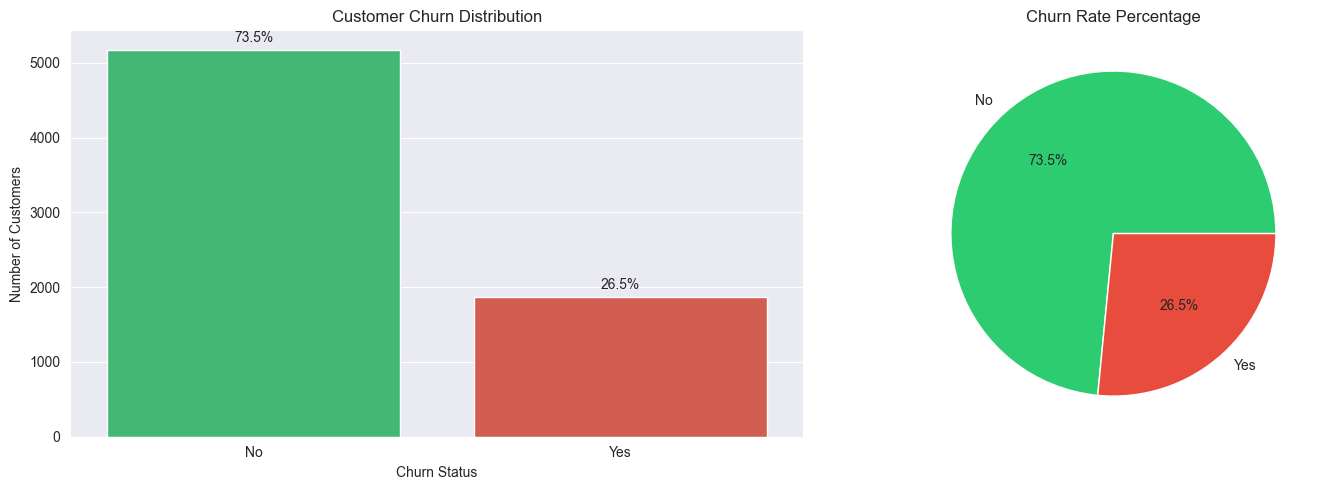

In [20]:
plt.figure(figsize=(15, 5))

# Subplot 1: Churn count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')

# Add percentage labels
total = len(df)
for i, p in enumerate(plt.gca().patches):
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height() + 100,
                  percentage, ha='center')

# Subplot 2: Churn percentage pie chart
plt.subplot(1, 2, 2)
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate Percentage')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [21]:
# Step 2.5: Data types summary
print("\n📋 DATA TYPES SUMMARY:")
print(df.dtypes)

print("\n✅ DATA QUALITY ASSESSMENT COMPLETE!")


📋 DATA TYPES SUMMARY:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

✅ DATA QUALITY ASSESSMENT COMPLETE!


## Step 3.1: Create a copy of the dataframe for cleaning

In [22]:
df_clean = df.copy()
print("🧹 STARTING DATA CLEANING PROCESS...")

🧹 STARTING DATA CLEANING PROCESS...


## Step 3.2: Fix TotalCharges - convert to numeric and handle empty values

In [23]:
print(f"\n🔧 FIXING TOTALCHARGES COLUMN:")
print(f"Empty values found: {len(df_clean[df_clean['TotalCharges'] == ' '])}")

# Replace empty strings with NaN and convert to numeric
df_clean['TotalCharges'] = df_clean['TotalCharges'].replace(' ', np.nan)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'])

print(f"Missing values after conversion: {df_clean['TotalCharges'].isnull().sum()}")


🔧 FIXING TOTALCHARGES COLUMN:
Empty values found: 11
Missing values after conversion: 11


## Step 3.3: Analyze rows with missing TotalCharges

In [24]:
print(f"\n📋 ANALYSIS OF ROWS WITH MISSING TOTALCHARGES:")
missing_total_charges = df_clean[df_clean['TotalCharges'].isnull()]
print(f"Number of rows with missing TotalCharges: {len(missing_total_charges)}")
print(f"Tenure distribution for these rows: {missing_total_charges['tenure'].value_counts()}")

# For customers with tenure=0 and missing TotalCharges, set TotalCharges = 0
df_clean.loc[df_clean['TotalCharges'].isnull(), 'TotalCharges'] = 0

print(f"Missing values after imputation: {df_clean['TotalCharges'].isnull().sum()}")


📋 ANALYSIS OF ROWS WITH MISSING TOTALCHARGES:
Number of rows with missing TotalCharges: 11
Tenure distribution for these rows: tenure
0    11
Name: count, dtype: int64
Missing values after imputation: 0


In [26]:
# Checl cleaned
df_clean

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Step 3.4: Standardize categorical values

In [27]:
print(f"\n🔄 STANDARDIZING CATEGORICAL VALUES:")

# Combine "No internet service" and "No phone service" with "No" for modeling
columns_to_standardize = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_standardize:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    print(f"Standardized {col}: {df_clean[col].unique()}")


🔄 STANDARDIZING CATEGORICAL VALUES:
Standardized MultipleLines: ['No' 'Yes']
Standardized OnlineSecurity: ['No' 'Yes']
Standardized OnlineBackup: ['Yes' 'No']
Standardized DeviceProtection: ['No' 'Yes']
Standardized TechSupport: ['No' 'Yes']
Standardized StreamingTV: ['No' 'Yes']
Standardized StreamingMovies: ['No' 'Yes']


## Step 3.5: Verify the cleaning

In [28]:
print(f"\n✅ CLEANING VERIFICATION:")
print(f"Dataset shape: {df_clean.shape}")
print(f"Data types after cleaning:")
print(df_clean.dtypes)

print(f"\n📊 MISSING VALUES AFTER CLEANING:")
print(df_clean.isnull().sum().sum())  # Should be 0


✅ CLEANING VERIFICATION:
Dataset shape: (7043, 21)
Data types after cleaning:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

📊 MISSING VALUES AFTER CLEANING:
0


## Step 3.6: Visualize the cleaned numeric features

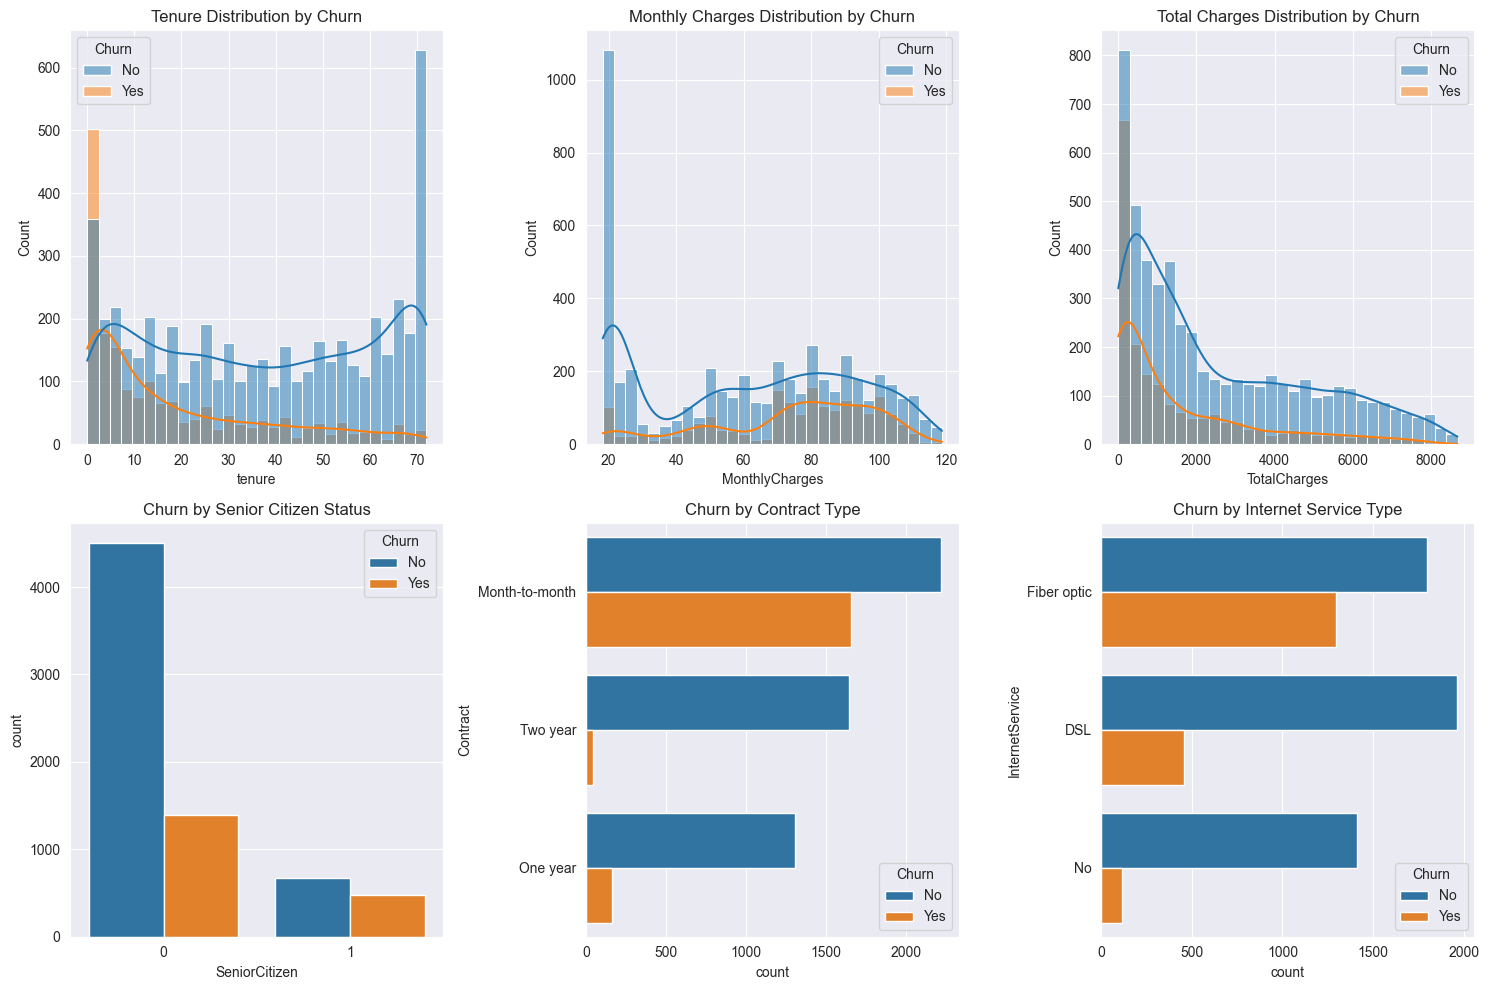


🎯 FINAL DATA QUALITY CHECK:
Total records: 7043
Churn rate: 26.54%
Data types confirmed - TotalCharges is now: float64

✅ DATA CLEANING COMPLETED SUCCESSFULLY!


In [29]:
plt.figure(figsize=(15, 10))

# Subplot 1: Tenure distribution
plt.subplot(2, 3, 1)
sns.histplot(data=df_clean, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')

# Subplot 2: MonthlyCharges distribution
plt.subplot(2, 3, 2)
sns.histplot(data=df_clean, x='MonthlyCharges', hue='Churn', bins=30, kde=True)
plt.title('Monthly Charges Distribution by Churn')

# Subplot 3: TotalCharges distribution
plt.subplot(2, 3, 3)
sns.histplot(data=df_clean, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title('Total Charges Distribution by Churn')

# Subplot 4: SeniorCitizen vs Churn
plt.subplot(2, 3, 4)
sns.countplot(data=df_clean, x='SeniorCitizen', hue='Churn')
plt.title('Churn by Senior Citizen Status')

# Subplot 5: Contract type vs Churn
plt.subplot(2, 3, 5)
sns.countplot(data=df_clean, y='Contract', hue='Churn', order=df_clean['Contract'].value_counts().index)
plt.title('Churn by Contract Type')

# Subplot 6: Internet Service vs Churn
plt.subplot(2, 3, 6)
sns.countplot(data=df_clean, y='InternetService', hue='Churn', order=df_clean['InternetService'].value_counts().index)
plt.title('Churn by Internet Service Type')

plt.tight_layout()
plt.show()

# Step 3.7: Final data quality check
print(f"\n🎯 FINAL DATA QUALITY CHECK:")
print(f"Total records: {len(df_clean)}")
print(f"Churn rate: {(df_clean['Churn'] == 'Yes').sum() / len(df_clean) * 100:.2f}%")
print(f"Data types confirmed - TotalCharges is now: {df_clean['TotalCharges'].dtype}")

print("\n✅ DATA CLEANING COMPLETED SUCCESSFULLY!")